In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from datetime import datetime, timedelta

In [4]:

np.random.seed(42)
random.seed(42)


num_orders = 1000
products = ['Laptop', 'Smartphone', 'Tablet', 'Headphones', 'Smartwatch']
countries = ['USA', 'UK', 'Germany', 'France', 'Canada']

# Tworzenie DataFrame
data = {
    'OrderID': range(1, num_orders + 1),
    'OrderDate': [datetime.now() - timedelta(days=np.random.randint(1, 365)) for _ in range(num_orders)],
    'Product': [random.choice(products) for _ in range(num_orders)],
    'Quantity': np.random.randint(1, 10, size=num_orders),
    'UnitPrice': np.random.uniform(100, 1000, size=num_orders).round(2),
    'Country': [random.choice(countries) for _ in range(num_orders)]
}

df = pd.DataFrame(data)

In [5]:
df.head()


,OrderID,OrderDate,Product,Quantity,UnitPrice,Country
0,1,2024-10-20 20:58:59.112863,Laptop,2,708.26,Germany
1,2,2024-02-17 20:58:59.112863,Laptop,8,498.45,Germany
2,3,2024-05-05 20:58:59.112863,Tablet,2,501.21,Canada
3,4,2024-10-16 20:58:59.112863,Smartphone,4,752.07,Canada
4,5,2024-11-20 20:58:59.112863,Smartphone,1,114.24,France


In [6]:
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

In [7]:
print("Średnia wartość zamówienia:", df['TotalAmount'].mean())
print("Mediana wartości zamówienia:", df['TotalAmount'].median())
print("Minimalna wartość zamówienia:", df['TotalAmount'].min())
print("Maksymalna wartość zamówienia:", df['TotalAmount'].max())
print("Całkowita liczba sprzedanych produktów:", df['Quantity'].sum())

Średnia wartość zamówienia: 2695.0985199999996
Mediana wartości zamówienia: 2107.76
Minimalna wartość zamówienia: 106.04
Maksymalna wartość zamówienia: 8997.66
Całkowita liczba sprzedanych produktów: 4975


In [8]:
most_sold_product = df['Product'].value_counts().idxmax()
print("Najczęściej sprzedawany produkt:", most_sold_product)

Najczęściej sprzedawany produkt: Headphones


In [10]:
revenue_by_product = df.groupby('Product')['TotalAmount'].sum()
highest_revenue_product = revenue_by_product.idxmax()
print("Produkt generujący największy przychód:", highest_revenue_product)

Produkt generujący największy przychód: Headphones


In [11]:
# 3. Analiza geograficzna
most_orders_country = df['Country'].value_counts().idxmax()
print("Kraj z największą liczbą zamówień:", most_orders_country)

Kraj z największą liczbą zamówień: Germany


In [12]:
avg_revenue_by_country = df.groupby('Country')['TotalAmount'].mean()
highest_avg_revenue_country = avg_revenue_by_country.idxmax()
print("Kraj z najwyższym średnim przychodem na zamówienie:", highest_avg_revenue_country)

Kraj z najwyższym średnim przychodem na zamówienie: USA


In [13]:
# 4. Analiza czasowa
df['OrderMonth'] = df['OrderDate'].dt.to_period('M')
orders_by_month = df['OrderMonth'].value_counts().sort_index()
print("Liczba zamówień w poszczególnych miesiącach:")
print(orders_by_month)

Liczba zamówień w poszczególnych miesiącach:
OrderMonth
2024-02     77
2024-03     76
2024-04     76
2024-05     88
2024-06    100
2024-07     77
2024-08     83
2024-09     95
2024-10     98
2024-11     57
2024-12     95
2025-01     78
Freq: M, Name: count, dtype: int64


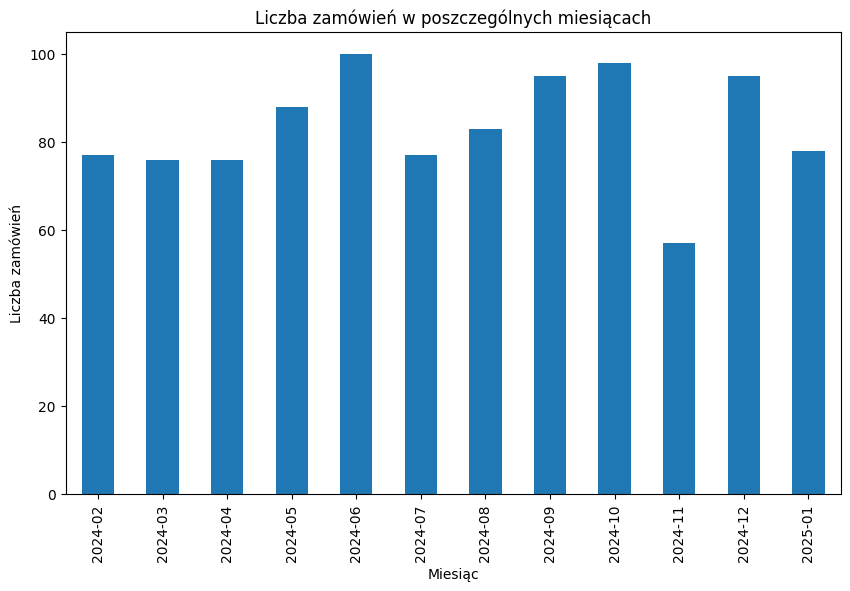

In [14]:
# Wykres liczby zamówień w poszczególnych miesiącach
orders_by_month.plot(kind='bar', figsize=(10, 6))
plt.title('Liczba zamówień w poszczególnych miesiącach')
plt.xlabel('Miesiąc')
plt.ylabel('Liczba zamówień')
plt.show()

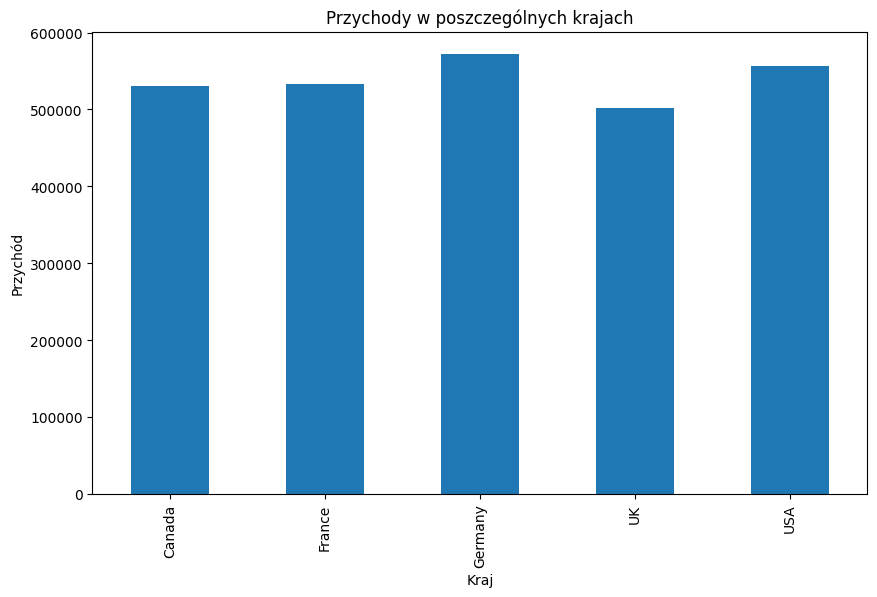

In [15]:
# Wykres rozkładu przychodów w poszczególnych krajach
revenue_by_country = df.groupby('Country')['TotalAmount'].sum()
revenue_by_country.plot(kind='bar', figsize=(10, 6))
plt.title('Przychody w poszczególnych krajach')
plt.xlabel('Kraj')
plt.ylabel('Przychód')
plt.show()